Project Title: House Price Prediction using Machine Learning
Objective: Predict house prices based on various features like location, size, number of rooms, etc.
Dataset Source:  Kaggle’s House Prices dataset

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

In [2]:
df = pd.read_csv(r"C:\Users\jeete\Documents\.ipynb_checkpoints\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df.isnull().sum())  # Check missing values

# Fill missing values in numeric columns with their median
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Convert categorical columns to numerical (Label Encoding)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Fill NaNs in categorical cols

print(df.isnull().sum())  # Verify missing values are handled

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

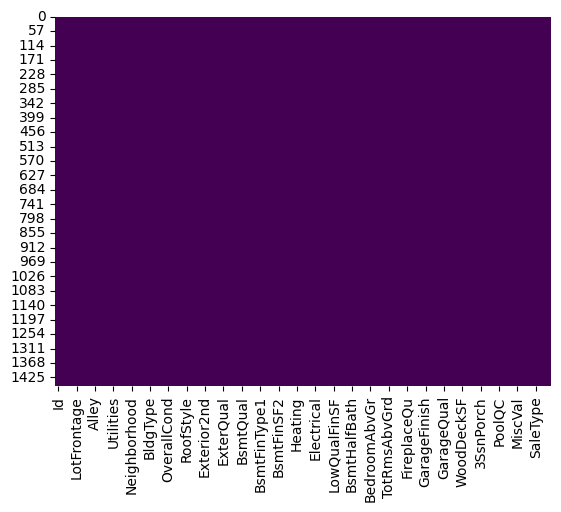

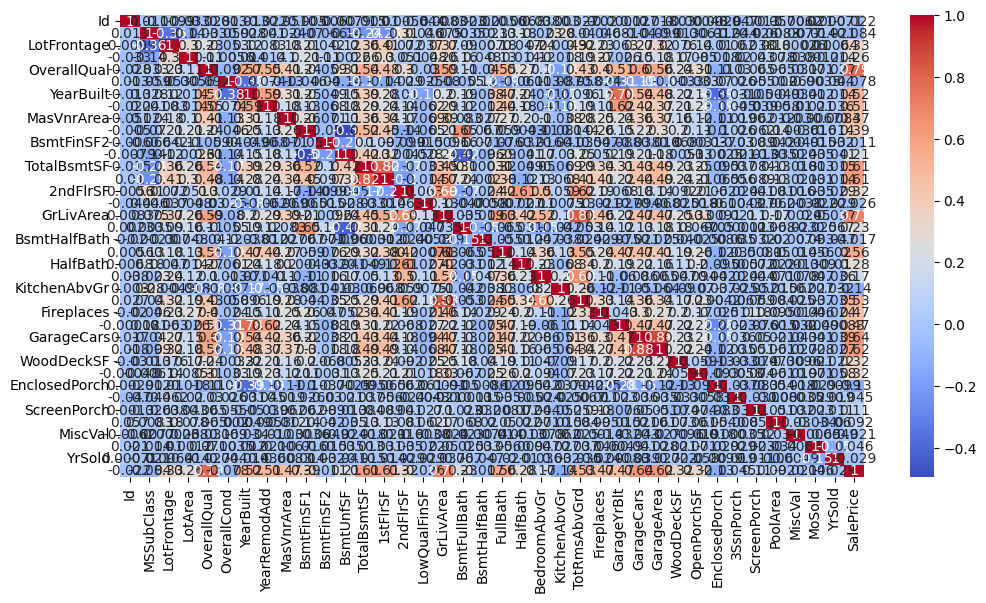

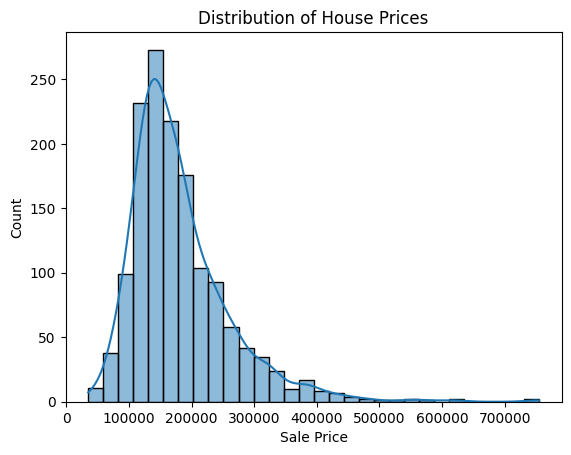

In [4]:
# Check dataset info
df.info()

# Visualize missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

# Show correlation heatmap 
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.show()


# Plot distribution of house prices
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.xlabel('Sale Price')
plt.title('Distribution of House Prices')
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns (like 'Id' if present)
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

# Separate features and target variable
X = df.drop(columns=['SalePrice'])  # Features
y = df['SalePrice']  # Target variable

# Select only numeric columns
X_numeric = X.select_dtypes(include=['number'])

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest")  


Random Forest - RMSE: 29588.87, R²: 0.89


In [13]:
import joblib

# Save the best performing model
joblib.dump(rf, "house_price_model.pkl")

# Save scaler for future use
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [19]:
for col in label_encoders:
    # Get the original classes seen by the encoder
    known_classes = label_encoders[col].classes_
    
    # Find unseen labels in new data
    unseen_labels = set(example_data_df[col]) - set(known_classes)
    
    if unseen_labels:
        print(f"Warning: Unseen labels {unseen_labels} in column '{col}'")

        # Add new labels to the encoder
        label_encoders[col].classes_ = np.append(known_classes, list(unseen_labels))

    # Now, safely transform the data
    example_data_df[col] = label_encoders[col].transform(example_data_df[col])


In [20]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = one_hot_encoder.fit_transform(X)

# Transform new data
example_data_encoded = one_hot_encoder.transform(example_data_df)


In [21]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = one_hot_encoder.fit_transform(X)

# Transform new data
example_data_encoded = one_hot_encoder.transform(example_data_df)
